# Introduction

This notebook shows how to load data using SeqIO.  The main idea here is to show how to load and deal with Lazy data. 

Smaller datasets can just be loaded completely into RAM and are generally more simple to work with.  Especially for more complicated actions. 

## Extra:

This notebook also goes into some basic information about Chunking and dealing with datasets in a lazy fashion.  This is a pretty involved topic but it is important if you are going to be dealing with large datasets.  For the most part if something is running slowly it is probably a problem with how the dataset is being chunked/loaded.  This can generally be fixed (hopefully through one of the tools developed here).

In [1]:
from SeqIO import load_folder
from SeqIO.version import __version__

/home/carter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/carter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=Tr

In [2]:
print(__version__)

0.07


First we will load some top and bottom images from the Celeritas detector.  You should be able to do the same thing with your data, assuming you change the input files.

In [4]:
signal = load_folder('tests/testUpgrade/')
lazy_signal = load_folder('tests/testUpgrade/', lazy=True, chunk_size=10)

`signal_type='Signal2D'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals.
`signal_type='Signal2D'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals.


The prebuffer:  123
The Image Height:  64
66
Grouping Bytes:  4038656
The prebuffer:  123
The Image Height:  64
66
Grouping Bytes:  4038656
The number of chunks (before accounting for nav_shape):  2


In [5]:
lazy_signal.data

dask.array<concatenate, shape=(190, 128, 256), dtype=uint16, chunksize=(10, 128, 256), chunktype=numpy.ndarray>

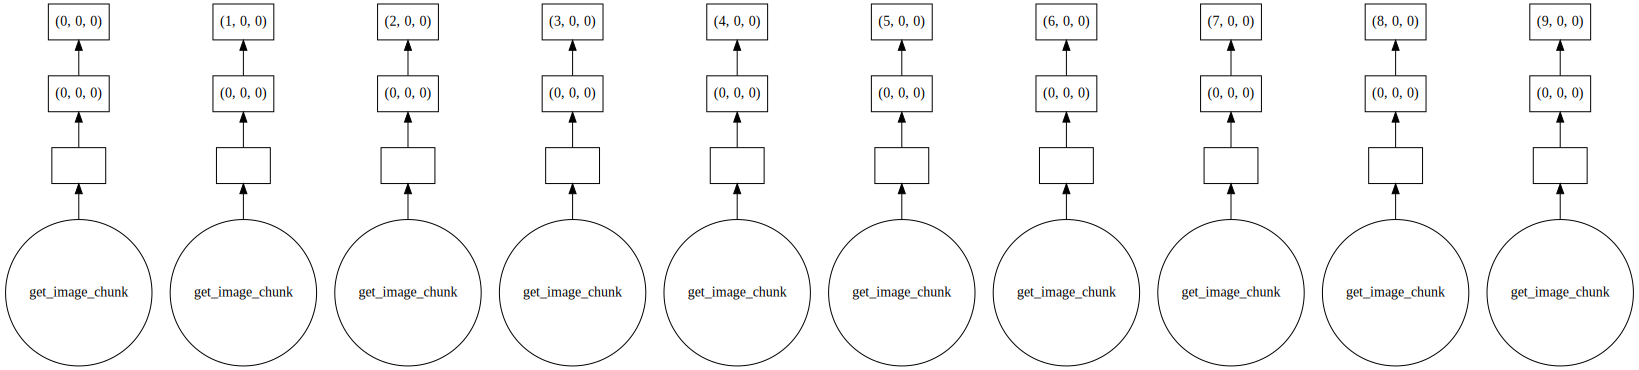

In [17]:
lazy_signal.data.visualize(filename='transpose.svg')

In [3]:
load_celeritas(top='/media/hdd/home/1000FPS SS7 200x200/top.seq',
               bottom ='/media/hdd/home/1000FPS SS7 200x200/bottom.seq')

No xml file is given. While the program might still run it is important to have and xml file.  At faster FPS the XML file will contain information necessary toproperly load the images
Trying to guess the segment pre-factor... Please Load XML File to help
Guessing the number of frames


`signal_type='Signal2D'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals.


<Signal2D, title: , dimensions: (40000|256, 256)>

We can see that with just the top and bottom images the loading will work but there is a message output. The XML file is very important in running the program.  It contains some experimental infromation which is necessary for loading the file.  The program can guess at the value but I'm not sure if it will always be correct. If you have the XML File (Which threre isn't really a reason you shouldn't) You should include it... 

In [2]:
#lets apply all of the corrections to the data. 
data = load_celeritas(top='/media/hdd/home/1000FPS SS7 200x200/top.seq',
                      bottom ='/media/hdd/home/1000FPS SS7 200x200/bottom.seq', 
                      xml_file='/media/hdd/home/1000FPS SS7 200x200/metadata.xml',
                      dark='/media/hdd/home/1000FPS SS7 200x200/dark.mrc',
                      metadata='/media/hdd/home/1000FPS SS7 200x200/metadata.metadata',
                     )

`signal_type='Signal2D'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals.


I'm pretty sure the ".metadata" file changed on me.  This might mean that the scale bars won't be properly applied but the data that I currently have doensn't have any scale bars anyways... 

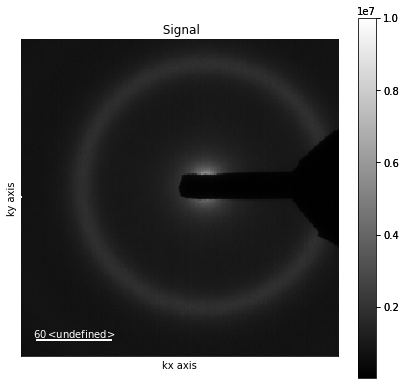

In [8]:
data.sum().plot(vmax=10000000)

You can also load the data lazily.  Which means that the data is not actually loaded into memory.  To do this the data is also no dark and gain corrected (at the time of loading).  When the data is plotted, or something that need calculation is done *then the data is corrected*.  If the loading or calculations are slow, you should just better sized chunks. 

They should be ~100 mb chunks. 

In [14]:
#lets apply all of the corrections to the data. 
data = load_celeritas(top='/media/hdd/home/1000FPS SS7 200x200/top.seq',
                      bottom ='/media/hdd/home/1000FPS SS7 200x200/bottom.seq', 
                      xml_file='/media/hdd/home/1000FPS SS7 200x200/metadata.xml',
                      dark='/media/hdd/home/1000FPS SS7 200x200/dark.mrc',
                      metadata='/media/hdd/home/1000FPS SS7 200x200/metadata.metadata',
                      lazy=True,
                      nav_shape=(200,200),
                      chunks=100
                     )

`signal_type='Signal2D'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals.


In [15]:
data.data

,Array,Chunk
Bytes,5.24 GB,78.64 MB
Shape,"(200, 200, 256, 256)","(3, 200, 256, 256)"
Count,696 Tasks,100 Chunks
Type,uint16,numpy.ndarray


We can also acess some of the metadata stored in the xlm file. This is stored under the .medatadata attribute in the General -> ImageData ->

In [16]:
data.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── camera_length = 1.3796232035098384e-306
│       └── magnification = 1.6021903457152946e-306
├── General
│   ├── ImageData
│   │   ├── Average = None
│   │   ├── CameraType = Celeritas Camera
│   │   ├── Correction = Dark And Gain
│   │   ├── DarkRef = Yes
│   │   ├── Filter = None
│   │   ├── Flip = None
│   │   ├── FrameRate = 1000.00
│   │   ├── GainRef = Yes
│   │   ├── ImageBinning = 1
│   │   ├── ImageDepth = 12
│   │   ├── ImageOffsetX = 384
│   │   ├── ImageOffsetY = 384
│   │   ├── ImageSizeX = 256
│   │   ├── ImageSizeY = 256
│   │   ├── Mag = 0
│   │   ├── OffChipCDS = No
│   │   ├── OkraMode = No
│   │   ├── PixelSize = 0
│   │   ├── RotationMode = 0
│   │   ├── ScaleBarLength = 0
│   │   ├── ScaleBarUnit = 
│   │   ├── Scaling = Auto
│   │   ├── SegmentPreBuffer = 64
│   │   ├── SensorGain = 1
│   │   ├── Sequence = 6
│   │   ├── ShutterMode = Global
│   │   ├── Temperature = -30
│   │   └── TotalFrames = 40000
│   ├── original_bottom_filename = bottom.seq
│   ├── original_top_filename = top.seq
│   └── title = 
└── Signal
    ├── binned = False
    └── signal_type = Signal2D